# nlopt's SLSQP (2.7.2) on regression tests

Using the constraint-obeying SLSQP in nlopt 2.7.2, run Process's regression tests.

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from process.io import plot_solutions as ps

## Single regression run

Run a single regression run using nlopt's SLSQP (2.7.2). Check the values of the constraints.

```
FTOL_REL = 1e-6
CONSTR_TOL = 1e-8
```

In [4]:
results_df = ps.run_and_print("baseline_jan_2017", "nlopt", rerun=False)

Scenario = baseline_jan_2017
Solver = nlopt
Objective function = 1.8922
Constraint residuals = 4.338e-09
Constraints above tolerance: 0
Constraint residuals =
normres001   -3.208500e-13
normres002    7.764900e-13
normres003   -2.331500e-15
normres004    2.811500e-12
normres005    3.108600e-15
normres006    2.047700e-09
normres007   -7.557300e-12
normres008    9.518300e-10
normres009   -3.558300e-13
normres010   -3.050100e-09
normres011   -2.903200e-09
normres012    5.773200e-15
normres013   -3.441700e-15
normres014   -1.676400e-14
normres015    2.242700e-14
normres016    1.965100e-13
normres017    4.218800e-15
normres018    6.921600e-12
Name: 0, dtype: float64


0 constraints violate the tolerance (most under 1e-9), hence the solution is feasible. The constraint residuals are very low (1e-9).

## Subset of regression tests

Run a few regression tests and see how they compare.

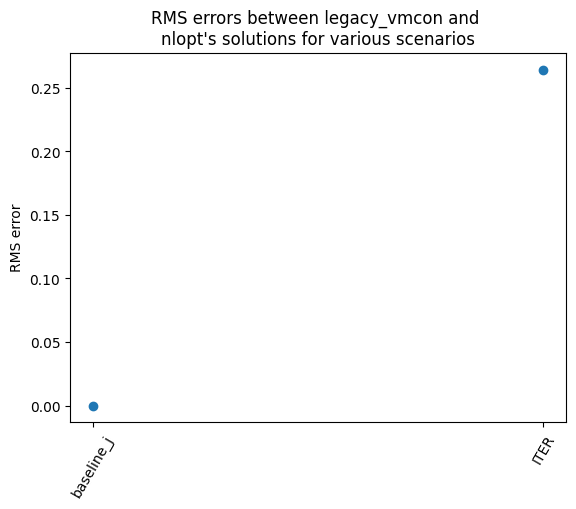

In [6]:
results_df = ps.compare_solvers_regression_tests(["legacy_vmcon", "nlopt"], scenarios=["baseline_jan_2017", "ITER", "L_mode", "Hybrid_mode", "QH_mode"], rerun_tests=False)

In [7]:
results_df[["tag", "sqsumsq"]]

,tag,sqsumsq
0,baseline_jan_2017_legacy_vmcon,2.085200e-10
1,ITER_legacy_vmcon,3.668900e-11
2,L_mode_legacy_vmcon,2.249300e-09
3,Hybrid_mode_legacy_vmcon,6.136600e-09
4,QH_mode_legacy_vmcon,9.473400e-09
5,baseline_jan_2017_nlopt,4.337600e-09
6,ITER_nlopt,2.608300e-10
7,L_mode_nlopt,NaN
8,Hybrid_mode_nlopt,NaN
9,QH_mode_nlopt,NaN


Compared to the "unfixed" SLSQP in nlopt (2.7.1), both baseline 2017 and ITER now find well-converged solutions, with low constraints.

However, the other 3 regression tests all fail due to hitting the evaluation limit of 200. 

Whilst the baseline result is unchanged, the iter result becomes more similar to the VMCON result compared to the nlopt 2.7.1 case, now that it is obeying its constraints.

## Conclusion

The fixed SLSQP works, in that it produces feasible solutions, but it's not particulary efficient: some of the tests hit high evaluation limits.